## Explore COVID19 Testing Data

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#### Johns Hopkins COVID19 Infections, Deaths and Recoveries
Dependent variables

In [4]:
df_confirmed = pd.read_csv('./csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Confirmed.csv')
df_deaths = pd.read_csv('./csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Deaths.csv')
df_recovered = pd.read_csv('./csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Recovered.csv')

In [5]:
# data cleaning and summing total events by country
def preprocess_summation(df, description):
    df = df.drop(['Province/State', 'Lat', 'Long'], axis=1).groupby(['Country/Region']).sum().reset_index()
    col_name = 'Total' + ' ' + description
    df[col_name] = df.apply(lambda r: sum(r[1:]), axis=1)
    df = df[['Country/Region', col_name]]
    df.columns = ['Country', col_name]
    df.replace({'Korea, South': 'South Korea', 'Czechia': 'Czech Republic', 'Taiwan*': 'Taiwan'}, inplace=True)
    return df

Dependent variables are the total number of events that have occurred in a region/country

In [6]:
total_infections = preprocess_summation(df_confirmed, 'Infections')
total_deaths = preprocess_summation(df_deaths, 'Deaths')
total_recovered = preprocess_summation(df_recovered, 'Recovered')
total_infections.head()

,Country,Total Infections
0,Afghanistan,74
1,Albania,160
2,Algeria,286
3,Andorra,14
4,Antigua and Barbuda,3


In [7]:
countries = total_infections['Country']
sorted([c for c in countries])[:5]

['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Antigua and Barbuda']

#### COVID19 Testing Data
https://ourworldindata.org/covid-testing


In [8]:
df_testing = pd.read_csv('./outside_data/covid-19-tests-country.csv')
df_testing.replace(regex={r'Canada.*': 'Canada', 
                          r'Australia.*': 'Australia', 
                          r'China.*': 'China',
                          r'United States.*': 'US'}, inplace=True)

df_testing = df_testing.drop(['Code', 'Year'], axis=1).groupby(['Entity']).sum().reset_index()
df_testing.columns = ['Country', 'NumTests']
df_testing['NumTests'] = df_testing['NumTests'].astype(int)
df_testing.head()

,Country,NumTests
0,Armenia,211
1,Australia,8657
2,Austria,6582
3,Bahrain,9201
4,Canada,10481


In [9]:
df = total_infections.merge( df_testing, how='inner', on='Country')
df.head()

,Country,Total Infections,NumTests
0,Armenia,67,211
1,Australia,2127,8657
2,Austria,3260,6582
3,Bahrain,1857,9201
4,Canada,1588,10481


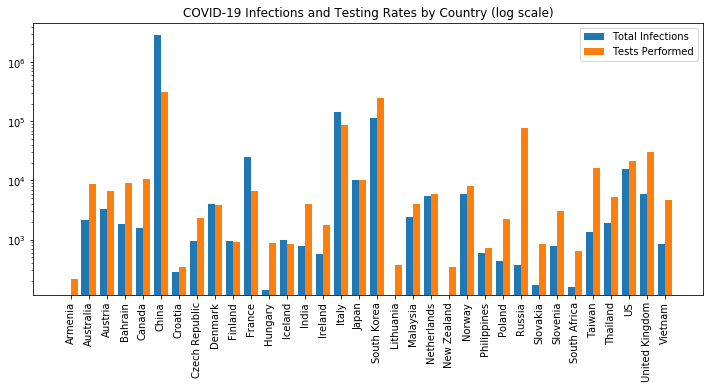

In [10]:
plt.figure(figsize=(12,5))
labels = df['Country']
x = np.arange(len(labels))

plt.bar(x-0.2, df['Total Infections'], width=0.4, align='center', label='Total Infections', log=True)
plt.bar(x+0.2, df['NumTests'], width=0.4,  align='center', label='Tests Performed', log=True)
plt.xticks(x, labels, rotation=90)
plt.legend()
plt.title('COVID-19 Infections and Testing Rates by Country (log scale)')
plt.show()

In [11]:
print('Median ratio of infections to number of tests:', round((df['Total Infections'] / df['NumTests']).median(), 4))
print('Mean ratio of infections to number of tests:', round((df['Total Infections'] / df['NumTests']).mean(), 4))

Median ratio of infections to number of tests: 0.3399
Mean ratio of infections to number of tests: 0.8294
